## Final Project Submission

Please fill out:
* Student name: GROUP 7
* Student pace: part time  
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Introduction

### Project Overview

As a real estate agency that helps homeowners buy and/or sell homes, we are tasked to support our stakeholders with appropriate advice to homeowners about how different factors with regard to their properties affect the sale price of their homes. 

The project mainly uses multiple linear regression modeling to analyze house sales in a northwestern county.

The findings of this project will lead to actionable insights that will be quite useful for homeowners in decision making in their next purchases and disposal of their assets.

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv which is part of this submission.



## Business Problem

The Business problem (s) that the project would like to answer are as below:
* To determine the relationship between sales price vs yr of renovation 
* To determine when a property/House was built and when it was sold
* To determine the relationship between the price of a property and bedrooms and bathrooms 
* To identify which houses sell more (Renovated/ unrenovated)
* To determine how the overal condition of the house would affect the price 
* To identify the price per squarefoot 

## Data Understanding

In [1]:
#import necessary Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#load the data
df_housing = pd.read_csv('data/kc_house_data.csv')

#set the display format for float numbers to show 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [3]:
df_housing.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287
21596,1523300157,10/15/2014,325000.00,2,0.75,1020,1076,2.00,NO,NONE,...,7 Average,1020,0.0,2008,0.00,98144,47.59,-122.30,1020,1357


In [4]:
#summary of dataframe
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

##### Short Explanation on the data.

* This is a Pandas Dataframe with 21597 rows and 21 columns.
* The data types in the data frame are  6 floats, 9 intergers (both numerical figures) and 6 objects(categorical figures 
* Missing values can be identified by taking number of entries minus the non null count per column. 
* The available columns are as follows: 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15
* The Memory usage for this dataFrame is 3.5+ KB
    

In [6]:
df_housing.corr()['price']

id              -0.02
price            1.00
bedrooms         0.31
bathrooms        0.53
sqft_living      0.70
sqft_lot         0.09
floors           0.26
sqft_above       0.61
yr_built         0.05
yr_renovated     0.13
zipcode         -0.05
lat              0.31
long             0.02
sqft_living15    0.59
sqft_lot15       0.08
Name: price, dtype: float64

### Data Cleaning and Preparation 

To clean the data in preparation for analysis, we start with :

1. Check duplicates in the 'id' column.
2. Drop duplicates if necessary. 
3. Identify and handle NAN (Not a Number) /missing values.
3. Check for place holders in 'price'column i.e 0.00
4. Convert data date types if necessary.
5. Identify outliers and either dropping / keeping them depending on the study objective.
6. Feature Engeering by creating new columns ie 'is_renovated'.
7. Determining columns that are irrelevant for the analysis and dropping them.


##### Dealing with duplicates

In [7]:
#check Duplicates in id column
duplicates_id = df_housing.duplicated(subset ='id')
duplicates_id.sum()

177

In [8]:
duplicates_id.sample(10)

3850     False
9118     False
16453    False
11806    False
8649     False
9586     False
1983     False
1644     False
9069     False
17511    False
dtype: bool

In [9]:
#drop the duplicate rows 
df_housing.drop_duplicates(subset='id',inplace = True)

#reconfirm duplicates have been removed
duplicates_id2 = df_housing.duplicated(subset ='id')
duplicates_id2.sum()

0

In [10]:
#drop íd to avoid it from appearing from the boxplot
df_housing.drop("id", axis=1,inplace= True)

##### Converting dates to pd.datetime

In [11]:
# convert date, yr_built, yr_renovated
df_housing['date'] = pd.to_datetime(df_housing['date'])
#df_housing['yr_built'] = pd.to_datetime(df_housing['yr_built'])
# df_housing['yr_renovated'] = pd.to_datetime(df_housing['yr_renovated'])

In [12]:
#confirm the data type 
print(df_housing['date'].dtype)
#print(df_housing['yr_built'].dtype)
# print(df_housing['yr_renovated'].dtype)


datetime64[ns]


##### Checking for Placeholders

In [13]:
# Check placeholders in price 
# Check unique values in the price column
unique_prices = df_housing['price'].unique()

#sort the unique values in ascending order
sorted_prices = sorted(unique_prices)
sorted_prices[0]

78000.0

In [14]:
df_housing['price'].describe()

count     21420.00
mean     540739.30
std      367931.11
min       78000.00
25%      322500.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

* No place holders were identified in the price column.
* The minimum price is 78,000
* The maximum price is 7,700,000

In [15]:
#identify unique values
df_housing['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [16]:
#identify unique values in bathrooms
df_housing['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [17]:
#round the float values to the nearest integer 
df_housing['bathrooms'] = df_housing['bathrooms'].round()


In [18]:
#identify Nans
df_housing['sqft_living'].isna().sum()

0

In [19]:
#check a sample
df_housing['sqft_living'].sample()

15182    2800
Name: sqft_living, dtype: int64

In [20]:
df_housing['sqft_living'].describe()

count   21420.00
mean     2083.13
std       918.81
min       370.00
25%      1430.00
50%      1920.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

In [21]:
#Map condition column to numerical codes
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
df_housing['condition'] = df_housing['condition'].map(condition_mapping)


In [22]:
#check a sample
df_housing['condition'].sample(5)

9077     4
4632     4
10695    3
4983     3
10231    3
Name: condition, dtype: int64

In [23]:
df_housing['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

##### Dealing with Missing Values

In [24]:
df_housing['yr_renovated'].isna().sum()

3804

In [25]:
df_housing['yr_renovated'].isna().mean()*100

17.759103641456583

In [26]:
# Replace NaN values with 0 in column 'yr_renovated'
#df_housing['yr_renovated']=df_housing['yr_renovated'].fillna(0.0)


In [27]:
# Drop NaN values with 0 in column 'yr_renovated'
df_housing.dropna(subset=['yr_renovated'], inplace=True)

##### Create new columns 'is_renovated' , 'yr_diff'

In [28]:
# Create a new column 'is_renovated' based on the values
df_housing['is_renovated'] = df_housing['yr_renovated'].apply(lambda x: 1 if x != 0 and isinstance(x, float) else 0)


In [29]:
#confirm the number of yes(1) and No(0)
df_housing['is_renovated'].value_counts()

0    16876
1      740
Name: is_renovated, dtype: int64

In [30]:
# Create a new column 'is_renovated' based on the values
#df_housing['date'] = pd.to_datetime(df_housing['date'])
df_housing['yr_diff'] = df_housing['date'].dt.year - df_housing['yr_built']


In [31]:
# Print the modified dataframe
df_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated,yr_diff
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,3,...,0.0,1955,0.00,98178,47.51,-122.26,1340,5650,0,59
1,2014-12-09,538000.00,3,2.00,2570,7242,2.00,NO,NONE,3,...,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639,1,63
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,NO,NONE,5,...,910.0,1965,0.00,98136,47.52,-122.39,1360,5000,0,49
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,NO,NONE,3,...,0.0,1987,0.00,98074,47.62,-122.05,1800,7503,0,28
5,2014-05-12,1230000.00,4,4.00,5420,101930,1.00,NO,NONE,3,...,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930,0,13


##### Identify Outliers

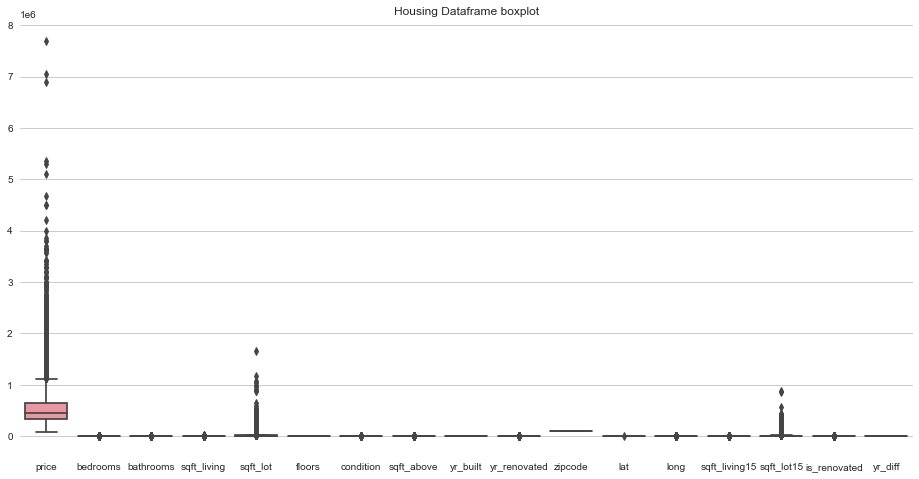

In [32]:
# Lets check for outliers. Lets plot our boxplot
# using seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data = df_housing, ax=ax)

# Set the plot title
plt.title('Housing Dataframe boxplot')

# Show the plot
plt.show();

* The data may have outliers in the column price, however it is a true representation of the market prices thus we will not exclude any data for the analysis.


##### Dropping columns

In [33]:
#check correration of the columns with price
df_housing.corr()['price']

price            1.00
bedrooms         0.31
bathrooms        0.52
sqft_living      0.70
sqft_lot         0.09
floors           0.26
condition        0.03
sqft_above       0.61
yr_built         0.05
yr_renovated     0.13
zipcode         -0.05
lat              0.31
long             0.02
sqft_living15    0.58
sqft_lot15       0.08
is_renovated     0.13
yr_diff         -0.05
Name: price, dtype: float64

In [34]:
# Columns to drop
columns_to_drop = ['lat','long','zipcode', 'view','floors', 'sqft_basement','waterfront','sqft_lot15','sqft_lot']

# Drop columns we are not using in our analysis
df_housing = df_housing.drop(columns=columns_to_drop)

In [35]:
#display summary of cleaned pandas df
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17616 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17616 non-null  datetime64[ns]
 1   price          17616 non-null  float64       
 2   bedrooms       17616 non-null  int64         
 3   bathrooms      17616 non-null  float64       
 4   sqft_living    17616 non-null  int64         
 5   condition      17616 non-null  int64         
 6   grade          17616 non-null  object        
 7   sqft_above     17616 non-null  int64         
 8   yr_built       17616 non-null  int64         
 9   yr_renovated   17616 non-null  float64       
 10  sqft_living15  17616 non-null  int64         
 11  is_renovated   17616 non-null  int64         
 12  yr_diff        17616 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.9+ MB


##### short explanation of the cleaned dataframe

* The DataFrame has 21,420 rows and 13 columns.
* The columns are 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'is_renovated', and 'yr_diff'.
* The 'date' column has a datetime64 data type.
* The 'price', 'bathrooms', 'yr_renovated', and 'grade' columns have float64 data type.
* The 'bedrooms', 'sqft_living', 'condition', 'sqft_above', 'yr_built', 'sqft_living15', 'is_renovated', and 'yr_diff' columns have int64 data type.
* The total memory usage of the DataFrame is approximately 2.3+ MB.


## Exploratory Data Analysis

In this step we perform tatistical and visualization techniques in order to uncover patterns, relationships, and insights within the data.

In [36]:
df_housing['price'].describe()

count     17616.00
mean     541036.83
std      369765.63
min       80000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

Explanation

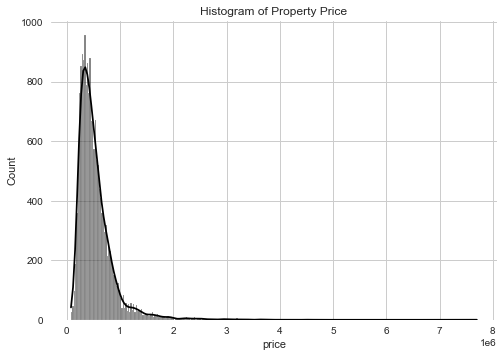

In [37]:
#create a histogram with a kernel density estimate KDE curve
sns.histplot(data = df_housing, x ='price', color='black',kde=True )

#Add a title
plt.title('Histogram of Property Price')

#show plot
plt.show()

In [38]:
df_housing['bedrooms'].describe()

count   17616.00
mean        3.38
std         0.93
min         1.00
25%         3.00
50%         3.00
75%         4.00
max        33.00
Name: bedrooms, dtype: float64

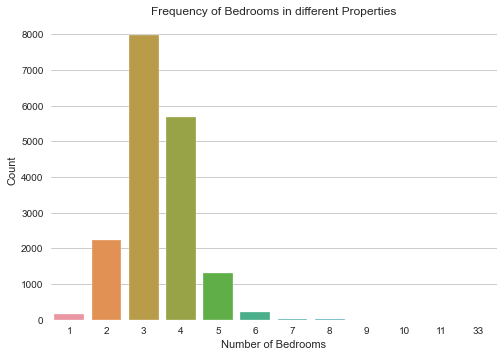

In [39]:
bedroom_counts = df_housing['bedrooms'].value_counts()

sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Frequency of Bedrooms in different Properties')
plt.show()

In [40]:
df_housing['bathrooms'].describe()

count   17616.00
mean        2.06
std         0.75
min         0.00
25%         2.00
50%         2.00
75%         2.00
max         8.00
Name: bathrooms, dtype: float64

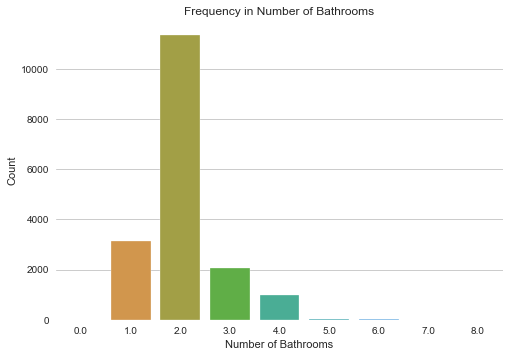

In [41]:
bathrooms_counts = df_housing['bathrooms'].value_counts()

sns.barplot(x=bathrooms_counts.index, y=bathrooms_counts.values)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Frequency in Number of Bathrooms')
plt.show()

In [42]:
df_housing['sqft_living'].describe()

count   17616.00
mean     2086.57
std       918.21
min       370.00
25%      1430.00
50%      1920.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

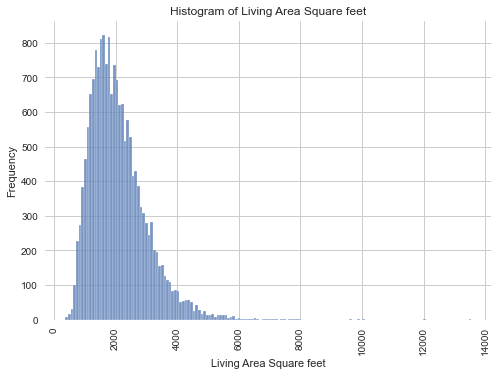

In [43]:
sns.histplot(data=df_housing, x='sqft_living')
plt.xlabel('Living Area Square feet')
plt.ylabel('Frequency')
plt.title('Histogram of Living Area Square feet')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()

In [44]:
df_housing['grade'].describe()

count         17616
unique           11
top       7 Average
freq           7292
Name: grade, dtype: object

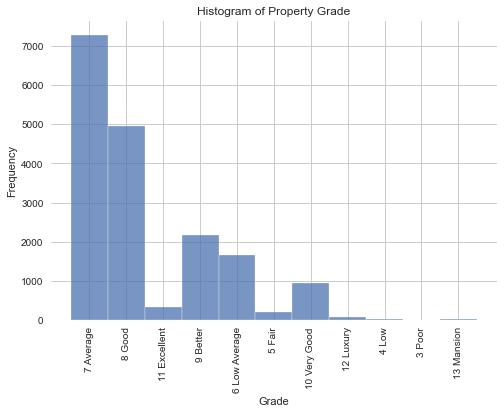

In [45]:
# Create a histogram using Seaborn
sns.histplot(data=df_housing, x='grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Histogram of Property Grade')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()

In [46]:
df_housing['condition'].describe()

count   17616.00
mean        3.41
std         0.65
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: condition, dtype: float64

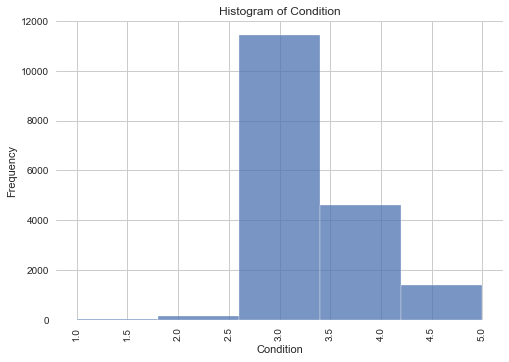

In [47]:
sns.histplot(data=df_housing, x='condition',bins= 5)
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Histogram of Condition')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()

### BIVARIATE ANALYSIS


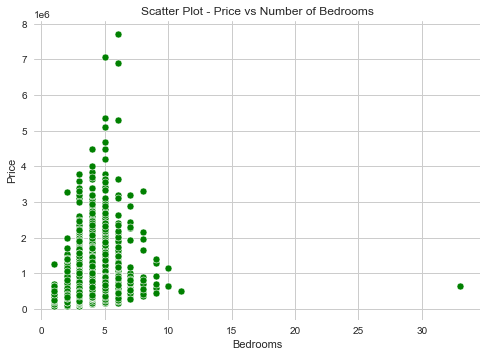

In [48]:
# Scatter plot: Price vs Number of Bedrooms
sns.scatterplot(data=df_housing, x='bedrooms', y='price',color = 'green')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot - Price vs Number of Bedrooms')
plt.show()

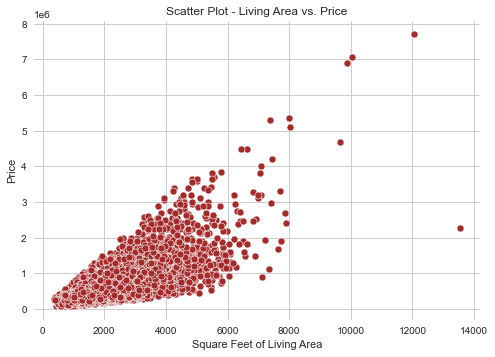

In [49]:
#plot sqft_living vs price
sns.scatterplot(data=df_housing, x='sqft_living', y='price', color='brown')
plt.xlabel('Square Feet of Living Area')
plt.ylabel('Price')
plt.title('Scatter Plot - Living Area vs. Price')

plt.show()

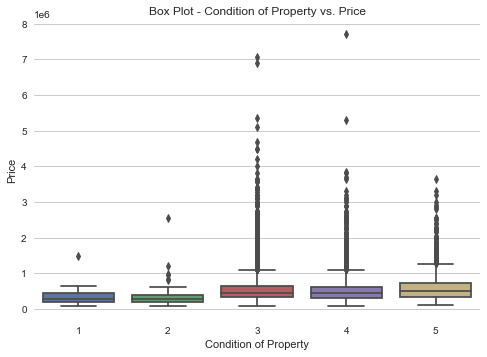

In [50]:
#Plot condition of property vs price
sns.boxplot(data=df_housing, x='condition', y='price')
plt.xlabel('Condition of Property')
plt.ylabel('Price')
plt.title('Box Plot - Condition of Property vs. Price')
plt.show()

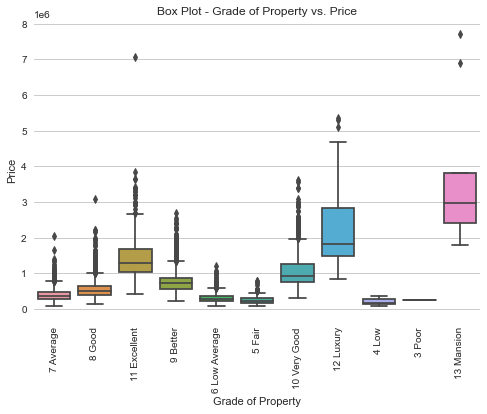

In [51]:
#Plot grade of property vs price
sns.boxplot(data=df_housing, x='grade', y='price')
plt.xlabel('Grade of Property')
plt.ylabel('Price')
plt.title('Box Plot - Grade of Property vs. Price')
plt.xticks(rotation='vertical')
plt.show()

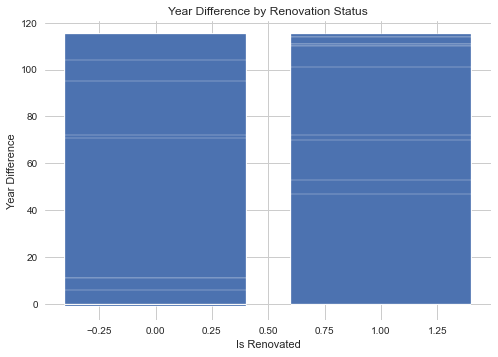

In [52]:

y = df_housing['yr_diff']
x = df_housing['is_renovated']

plt.bar(x, y)
plt.xlabel('Is Renovated')
plt.ylabel('Year Difference')
plt.title('Year Difference by Renovation Status')
plt.show()

In [55]:
df_selected = df_housing[['bedrooms', 'bathrooms', 'sqft_living', 'condition', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'is_renovated', 'yr_diff', 'price']]
X = df_selected.drop('price', axis=1)
y = df_selected['price']

In [54]:
Housing['sqft_living'].quantile([0.1, 0.9])

NameError: name 'Housing' is not defined

In [56]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2331.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        15:33:15   Log-Likelihood:            -2.4342e+05
No. Observations:               17616   AIC:                         4.869e+05
Df Residuals:                   17605   BIC:                         4.869e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.086e+07   7.92e+06     -5.162

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price ~ bedrooms + bathrooms + sqft_living + condition + sqft_above + yr_built + yr_renovated + sqft_living15  + is_renovated + yr_diff'
model1 = ols(formula, data=df_selected).fit()


In [77]:
summary = model1.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2331.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        16:20:19   Log-Likelihood:            -2.4342e+05
No. Observations:               17616   AIC:                         4.869e+05
Df Residuals:                   17605   BIC:                         4.869e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.086e+07   7.92e+06     -5.162

In [78]:
r_squaredm = model1.rsquared

In [60]:
import pandas as pd

# Calculate correlation coefficients between 'price' and other variables
correlations = df_selected.corr()['price'].abs().sort_values(ascending=False)

# Print the variable with the highest correlation to 'price'
highest_corr_variable = correlations.index[1]  # Exclude 'price' itself, so index 1 has the highest correlation
highest_corr_value = correlations.iloc[1]

print(f"The variable with the highest correlation to 'price' is '{highest_corr_variable}' with a correlation value of {highest_corr_value:.3f}.")


The variable with the highest correlation to 'price' is 'sqft_living' with a correlation value of 0.703.


In [64]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [70]:

formula = 'price ~ sqft_living'
model = ols(formula, data=df_selected).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.725e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        16:06:57   Log-Likelihood:            -2.4483e+05
No. Observations:               17616   AIC:                         4.897e+05
Df Residuals:                   17614   BIC:                         4.897e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.004e+04   4916.406    -10.178      

In [72]:
r_squared = model.rsquared
model_is_significant =model.f_pvalue < 0.05

In [75]:
# Replace None with appropriate code

# Slope (coefficient of GrLivArea)
m = model.params['sqft_living']

# Intercept (coefficient of Intercept)
b = model.params['Intercept']
# YOUR CODE HER

print(f"""
Our simple linear regression model found a y-intercept
of ${round(b, 2)}, then for every increase of 1 square foot living area, the price increases by ${round(m, 2)} 
""")


Our simple linear regression model found a y-intercept
of $-50039.18, then for every increase of 1 square foot
above-ground living area, the price increases by $283.28 



In [79]:
r_squared_linear = r_squared
r_squared_multiple = r_squaredm

In [83]:
r_squared_linear < r_squared_multiple

True